$$ \textbf{EE6201 Control Systems} $$

$$ \textbf{Simulation 2} $$

$$ \textbf{Time-domain simulations of continuous-time LTI systems} $$

$$ \text{Prepared by: Güray Gürkan, PhD} $$

$$ \text{May, 2017} $$


### Linear System Simulators in Control Module

To simulate outputs of generated LTI systems, there exist important functions in control module. 

- ** lsim(model, amplitudes, time) : **

Simulates output of a (given) transfer function for an arbitrary input. Input should be defined in amplitude and time pair (as seperate but same-sized vectors)

- ** impulse(model, (time)) : ** 

Simulates output of a (given) transfer function for dirac input. Output is the impulse response of the transfer function.

- ** step(model, (time)): **

Simulates output of a (given) transfer function for unit step (DC) input. Output is the step (unit DC) response of the transfer function.


### Example

We want to simulate output signal $y(t)$ for specific input signals $x(t)$ of the system:

$$ G(s) = \frac{1}{s+1} $$

- Simulate output for unit-step input, $u(t)$
- Simulate output for unit-impulse input, $\delta(t)$



#### Solution using $lsim()$ function:

** 1) Step response **

array_out = lsim(model, U=amplitudes, T=time)

1. Generation of model (transfer function in this case)

2. Generation of input vector, the unit-step function

3. Generation of time vector (strictly related to input duration)

4. Generating output variable.

5. Plotting time vs. output signal.



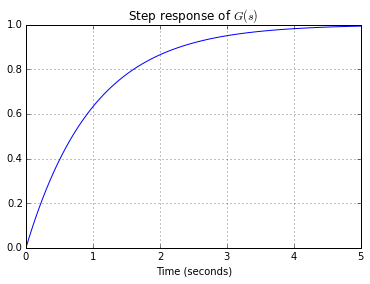

In [6]:
import numpy as np # normally we populate all functions of numpy to workspace
import control as ctl

#1
G = ctl.tf(1, [1,1])
#2
amplitude = np.ones(100) # vector of 1's, with 100 elements as u(t)
#3
time = np.linspace(0,5,100)  # time vector from 0 to 5 seconds with 100 elements
#4
output = ctl.lsim(G,U=amplitude,T=time)

y = output[0]
t = output[1]

#5
%matplotlib  inline

plot(t,y)
grid(1)
xlabel("Time (seconds)")
title("Step response of $G(s)$")


** 2) Impulse response **

array_out = lsim(model, U=amplitudes, T=time)

1. Generation of model (transfer function)

2. Generation of input vector, the unit-impulse function

3. Generation of time vector (strictly related to input duration)

4. Generating output variable.

5. Plotting time vs. output signal.

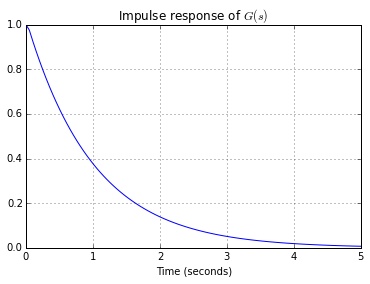

In [18]:
import numpy as np 
import control as ctl

#1
G = ctl.tf(1, [1,1])
#2
amplitude = np.hstack((1,np.zeros(99))) # [1,0,0, ... , 0]
#3
time = np.linspace(0,5,100)  # time vector from 0 to 5 seconds with 100 elements
#4
output = ctl.lsim(G,U=amplitude,T=time,X0=1)

y = output[0]
t = output[1]

#5
%matplotlib  inline

plot(t,y)
grid(1)
xlabel("Time (seconds)")
title("Impulse response of $G(s)$")


#### Solution using $step()$ and $impulse()$ functions:

- $lsim()$ is powerful for arbitrary shaped inputs

- However, for impulse and step input simulations, there exists two specific functions:

    - $impulse()$
    
    - $step()$
    
- These functions automatically generate amplitude ($U$) and time ($T$) vectors.



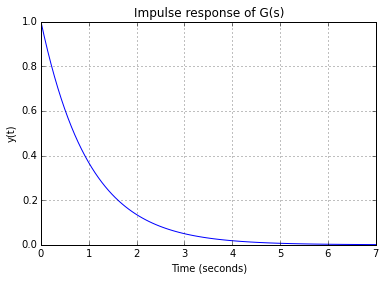

In [22]:
# Impulse response

out = ctl.impulse(G)

plot(out[1], out[0])
xlabel("Time (seconds)")
ylabel("y(t)")
title("Impulse response of G(s)")
grid(1)

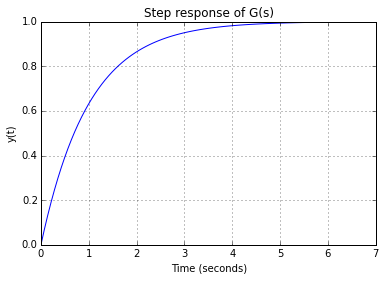

In [21]:
# Step response

out2 = ctl.step(G)

plot(out2[1], out2[0])
xlabel("Time (seconds)")
ylabel("y(t)")
title("Step response of G(s)")
grid(True)
